In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import obspy
import os
from obspy.clients.fdsn import Client as irisClient
from obspy.clients.arclink.client import Client
from obspy.taup import TauPyModel
from obspy.geodetics import kilometer2degrees
from obspy.io.xseed import Parser
from scipy.stats.stats import pearsonr
from obspy.signal.invsim import corn_freq_2_paz
import numpy as np
from obspy.signal.cross_correlation import  xcorr_max,correlate
from obspy.signal import rotate
from mpl_toolkits.basemap import Basemap
import shapefile
from obspy.clients.fdsn import Client

### Coletando os arquivos da estação SMTB 

In [3]:
ev_list = []
ev_listS = []

for root, dirs, files in os.walk('/home/diogo/dados_doutorado/parnaiba_basin/assessing_data/data_7mb/event_data/SMTB/'):
    for datafile in files:
        if datafile.startswith('BR'):
            ev_list.append(os.path.join(root, datafile))
ev_listS = sorted(ev_list)

In [4]:
ev_SMTB_event = [i.split('/')[10] for i in ev_listS]

In [5]:
ev_SMTB = [i[:7] for i in ev_SMTB_event]

In [6]:
event_SMTB = sorted(list(set(ev_SMTB)))

In [7]:
events_files = [[] for x in range(len(event_SMTB))]
for i,j in enumerate(ev_listS):
    for k,l in enumerate(event_SMTB):
        if l in j:
            events_files[k].append(j)

### Coletando os arquivos das estações da rede BP 

In [8]:
ev_BB_list = []
ev_BB_listS = []

for root, dirs, files in os.walk('/home/diogo/dados_doutorado/parnaiba_basin/assessing_data/data_7mb/event_data/'):
    for datafile in files:
        if datafile.startswith('BP'):
            ev_BB_list.append(os.path.join(root, datafile))
ev_BB_listS = sorted(ev_BB_list)

In [9]:
BB_STA_1 = [i.split('/')[8] for i in ev_BB_listS]

In [10]:
BB_STA = sorted(list(set(BB_STA_1)))

In [11]:
BPPF_files = []
BUCO_files = []
GENI_files = []
GRJU_files = []
PRDT_files = []
STSN_files = []
STSR_files = []
TRZN_files = []

In [12]:
for k,j in enumerate(ev_BB_listS):
            if 'BPPF'  in j:
                BPPF_files.append(j)
            elif 'BUCO' in j:
                BUCO_files.append(j)
            elif 'GENI' in j:
                GENI_files.append(j)
            elif 'GRJU' in j:
                GRJU_files.append(j)
            elif 'PRDT' in j:
                PRDT_files.append(j)
            elif 'STSN' in j:
                STSN_files.append(j)
            elif 'STSR' in j:
                STSR_files.append(j)
            else:
                TRZN_files.append(j)

In [13]:
events_BPPF_files = [[] for x in range(len(event_SMTB))]
events_BUCO_files = [[] for x in range(len(event_SMTB))]
events_GENI_files = [[] for x in range(len(event_SMTB))]
events_GRJU_files = [[] for x in range(len(event_SMTB))]
events_PRDT_files = [[] for x in range(len(event_SMTB))]
events_STSN_files = [[] for x in range(len(event_SMTB))]
events_STSR_files = [[] for x in range(len(event_SMTB))]
events_TRZN_files = [[] for x in range(len(event_SMTB))]

In [14]:
for i,j in enumerate(BPPF_files):
    for k,l in enumerate(event_SMTB):
        if l  in j:
            events_BPPF_files[k].append(j)

                
for i,j in enumerate(BUCO_files):
    for k,l in enumerate(event_SMTB):
        if l in j:
             events_BUCO_files[k].append(j)


for i,j in enumerate(GENI_files):
    for k,l in enumerate(event_SMTB):
        if l in j:
            events_GENI_files[k].append(j)
            
            
for i,j in enumerate(GRJU_files):
    for k,l in enumerate(event_SMTB):
        if l in j:
            events_GRJU_files[k].append(j)
            
            
for i,j in enumerate(PRDT_files):
    for k,l in enumerate(event_SMTB):
        if l in j:
             events_PRDT_files[k].append(j)
                
                
                
for i,j in enumerate(STSN_files):
    for k,l in enumerate(event_SMTB):
        if l in j:
            events_STSN_files[k].append(j)
            
            
            
for i,j in enumerate(STSR_files):
    for k,l in enumerate(event_SMTB):
        if l in j:
             events_STSR_files[k].append(j)
                
                
for i,j in enumerate(TRZN_files):
    for k,l in enumerate(event_SMTB):
        if l in j:
            events_TRZN_files[k].append(j)

### Comparando os arquivos das estações da rede BP com a estação SMTB

In [19]:
event_select = '2016.14.'

In [20]:
st_SMTB = obspy.Stream()
for i,j in enumerate(events_files[-1]):
    st_SMTB += obspy.read(j)

In [21]:
st_BPPF = obspy.Stream()
for i,j in enumerate(events_BPPF_files[-1]):
    st_BPPF += obspy.read(j)
            
st_BUCO  = obspy.Stream()
for i,j in enumerate(events_BUCO_files[-1]):
            st_BUCO += obspy.read(j)
            
st_GENI = obspy.Stream()
for i,j in enumerate(events_GENI_files[-1]):
            st_GENI += obspy.read(j)
            
st_GRJU = obspy.Stream()
for i,j in enumerate(events_GRJU_files[-1]):
            st_GRJU += obspy.read(j)

st_PRDT = obspy.Stream()
for i,j in enumerate(events_PRDT_files[-1]):
            st_PRDT += obspy.read(j)
            
st_STSN = obspy.Stream()
for i,j in enumerate(events_STSN_files[-1]):
            st_STSN += obspy.read(j)
            
st_STSR = obspy.Stream()
for i,j in enumerate(events_STSR_files[-1]):
            st_STSR += obspy.read(j)
            
st_TRZN = obspy.Stream()
for i,j in enumerate(events_TRZN_files[-1]):
            st_TRZN += obspy.read(j)

In [22]:
st = [st_SMTB,st_BPPF,st_BUCO,st_GENI,st_GRJU,st_PRDT,st_STSN,st_STSR,st_TRZN]

# Filtrando os dados obtidos para o intervalo de frequência das ondas de corpo (50 s - 100 s)

In [23]:
freqmin=0.006
freqmax=0.02

In [24]:
for i,j in enumerate(st):
        j.detrend("demean")
        j.taper(0.05)
        j.filter("bandpass", freqmin=freqmin, freqmax=freqmax)
        j.decimate(factor=10, strict_length=False)

### Rotacionando segundo o BAZ os arquivos das estações da rede BP e da estação SMTB

In [25]:
for i,j in enumerate(st):
        j.rotate(method='NE->RT', back_azimuth=j[0].stats.sac.baz)

In [26]:
st_BP = [st_BPPF,st_BUCO,st_GENI,st_GRJU,st_PRDT,st_STSN,st_STSR,st_TRZN]

In [27]:
st_BP_lst = [item for sublist in st_BP for item in sublist]

In [28]:
baz_lst = np.arange(0,360.1,0.1)

In [138]:
%%time

R = []
T = []
Z = []
for i,j in enumerate(baz_lst):
    data = rotate.rotate_ne_rt(st_STSR[1].data, st_STSR[0].data,  j)
    R.append(data[0])
    T.append(data[1])

CPU times: user 692 ms, sys: 444 ms, total: 1.14 s
Wall time: 1.15 s


In [139]:
SMTB_T = st_SMTB[0].data
SMTB_R = st_SMTB[1].data

In [140]:
%%time

xcorr_RESULT_R = []
xcorr_RESULT_T = []


for i,j in enumerate(T):
    xcorr_RESULT_T.append(correlate(SMTB_T,T[i],shift=2000))
    xcorr_RESULT_R.append(correlate(SMTB_R,R[i],shift=2000))

CPU times: user 34.8 s, sys: 156 ms, total: 34.9 s
Wall time: 34.9 s


In [141]:
%%time

xcorr_max_R = []
xcorr_max_T = []


for i,j in enumerate(T):
    xcorr_max_R.append(xcorr_max(xcorr_RESULT_R[i]))
    xcorr_max_T.append(xcorr_max(xcorr_RESULT_T[i]))

CPU times: user 80 ms, sys: 0 ns, total: 80 ms
Wall time: 79.5 ms


In [142]:
xcorr_max_R[1]

(-902, -0.7100080579155821)

CPU times: user 7.76 s, sys: 24 ms, total: 7.78 s
Wall time: 7.78 s


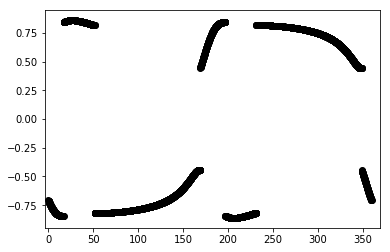

In [149]:
%%time
for i,j in enumerate(xcorr_max_R):
    plt.plot(baz_lst[i],j[1],'ok')
    #plt.ylim(0.5,0.85)
    plt.xlim(-4,369)

CPU times: user 6.96 s, sys: 20 ms, total: 6.98 s
Wall time: 7.01 s


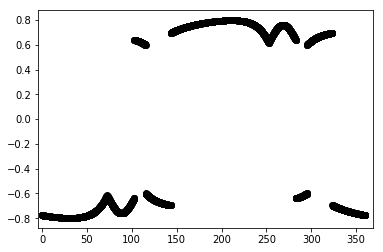

In [150]:
%%time
for i,j in enumerate(xcorr_max_R):
    plt.plot(baz_lst[i],xcorr_max_T[i][1],'ok')
    #plt.ylim(0.5,0.85)
    plt.xlim(-4,369)

In [111]:
maxima_T, index_max_T = max((val, idx) for idx, val in enumerate(xcorr_RESULT_T))
maxima_R, index_max_R = max((val, idx) for idx, val in enumerate(xcorr_RESULT_R))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [88]:
maxima_T, index_max_T

(0.7979022422928773, 21)

In [89]:
maxima_R, index_max_R

(0.8589442224483712, 3)

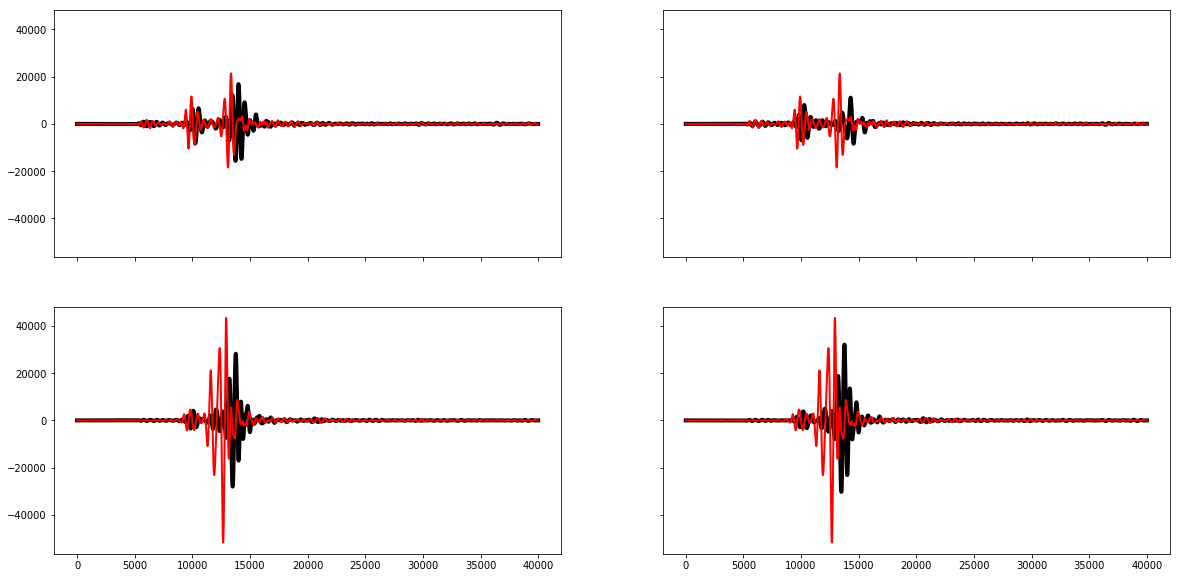

In [90]:
f, axarr = plt.subplots(figsize=(20, 10),nrows=2, ncols=2,sharex=True,sharey=True)

axarr[0,0].plot(R[index_max_R],'k',lw=4)
axarr[0,1].plot(st_STSR[1],'k',lw=4)
axarr[0,0].plot(st_SMTB[1],'r',lw=2)
axarr[0,1].plot(st_SMTB[1],'r',lw=2)

axarr[1,0].plot(T[index_max_T],'k',lw=4)
axarr[1,1].plot(st_STSR[0],'k',lw=4)
axarr[1,0].plot(st_SMTB[0],'r',lw=2)
axarr[1,1].plot(st_SMTB[0],'r',lw=2)

In [92]:
print(st_STSR_orig[1].stats.sac.baz)

NameError: name 'st_STSR_orig' is not defined

In [93]:
baz_lst[index_max_R], baz_lst[index_max_T]

(30, 210)

In [ ]:
K = np.array(xcorr_RESULT_R)
casa = np.argsort(K)


In [ ]:
index_max_R

In [ ]:
index_max_T

In [ ]:
casa[:3]

In [ ]:
print([baz_lst[i] for i in casa[:5]])

In [ ]:
print([xcorr_RESULT_R[i] for i in casa[:5]])

### Coletando os arquivos da estação ROSB 

In [ ]:
ev_list_ROSB = []
ev_list_ROSBS = []

for root, dirs, files in os.walk('/home/diogo/dados_doutorado/parnaiba_basin/assessing_data/STA_data/ROSB/'):
    for datafile in files:
        if datafile.startswith('BR'):
            ev_list_ROSB.append(os.path.join(root, datafile))
ev_list_ROSBS = sorted(ev_list_ROSB)

In [ ]:
ev_ROSB_event = [i.split('/')[10] for i in ev_list_ROSB]

In [ ]:
ev_ROSB = [i[:7] for i in ev_ROSB_event]

In [ ]:
event_ROSB = sorted(list(set(ev_ROSB)))

In [ ]:
events_files_ROSB = [[] for x in range(len(event_ROSB))]
for i,j in enumerate(ev_list_ROSBS):
    for k,l in enumerate(event_ROSB):
        if l in j:
            events_files_ROSB[k].append(j)

In [ ]:
st_ROSB = obspy.Stream()
for i,j in enumerate(events_files_ROSB[0]):
    st_ROSB += obspy.read(j)

# Filtrando os dados obtidos para o intervalo de frequência das ondas de corpo (50 s - 100 s)

In [ ]:
for i,j in enumerate(st_ROSB):
        j.detrend("demean")
        j.taper(0.05)
        j.filter("bandpass", freqmin=0.01, freqmax=0.02)
        j.decimate(factor=10, strict_length=False)

In [ ]:
st_ROSB

### Rotacionando segundo o BAZ os arquivos das estações da rede BP e da estação ROSB

In [ ]:
st_ROSB.rotate(method='NE->RT', back_azimuth=st_ROSB[0].stats.sac.baz)

# Comparando os arquivos das estações da rede BP com as estações ROSB e SMTB

### Componente Z

In [ ]:
ROSB_Z = st_ROSB[2::3]
st_BP_Z = st_BP_lst[2::3]
SMTB_Z = st_SMTB[2::3]

In [ ]:
f, axarr = plt.subplots(figsize=(20, 30),nrows=len(st_BP_Z), ncols=2,sharex=True)
for i,j in enumerate(st_BP_Z):
    axarr[i,0].plot(ROSB_Z[0].times(),ROSB_Z[0].data,'r',lw=2,label=ROSB_Z[0].stats.station)
    axarr[i,0].plot(j.times(),j.data,'k',lw=2,label=j.stats.station)
    axarr[i,0].set_yticks([])
    axarr[i,0].set_xlim(0,2000)
    axarr[i,0].legend(loc='upper right')
    
    axarr[i,1].plot(SMTB_Z[0].times(),SMTB_Z[0].data,'r',lw=2,label=SMTB_Z[0].stats.station)
    axarr[i,1].plot(j.times(),j.data,'k',lw=2,label=j.stats.station)
    axarr[i,1].set_yticks([])
    axarr[i,1].set_xlim(0,2000)
    axarr[i,1].legend(loc='upper right')

### Componente N

In [ ]:
SMTB_N = st_SMTB[1::3]
ROSB_N = st_ROSB[1::3]
st_BP_N = st_BP_lst[1::3]

In [ ]:
f, axarr = plt.subplots(figsize=(20, 30),nrows=len(st_BP_N), ncols=2,sharex=True)
for i,j in enumerate(st_BP_N):
    axarr[i,0].plot(ROSB_N[0].times(),ROSB_N[0].data,'r',lw=2,label=ROSB_N[0].stats.station)
    axarr[i,0].plot(j.times(),j.data,'k',lw=2,label=j.stats.station)
    axarr[i,0].set_yticks([])
    axarr[i,0].set_xlim(0,2000)
    axarr[i,0].legend(loc='upper right')
    
    axarr[i,1].plot(SMTB_N[0].times(),SMTB_N[0].data,'r',lw=2,label=SMTB_N[0].stats.station)
    axarr[i,1].plot(j.times(),j.data,'k',lw=2,label=j.stats.station)
    axarr[i,1].set_yticks([])
    axarr[i,1].set_xlim(0,2000)
    axarr[i,1].legend(loc='upper right')

### Componente E

In [ ]:
SMTB_E = st_SMTB[::3]
st_BP_E = st_BP_lst[::3]
ROSB_E = st_ROSB[::3]

In [ ]:
f, axarr = plt.subplots(figsize=(20, 30),nrows=len(st_BP_E), ncols=2,sharex=True)
for i,j in enumerate(st_BP_E):
    axarr[i,0].plot(ROSB_E[0].times(),ROSB_E[0].data,'r',lw=2,label=ROSB_E[0].stats.station)
    axarr[i,0].plot(j.times(),j.data,'k',lw=2,label=j.stats.station)
    axarr[i,0].set_yticks([])
    axarr[i,0].set_xlim(0,2000)
    axarr[i,0].legend(loc='upper right')
    
    axarr[i,1].plot(SMTB_E[0].times(),SMTB_E[0].data,'r',lw=2,label=SMTB_E[0].stats.station)
    axarr[i,1].plot(j.times(),j.data,'k',lw=2,label=j.stats.station)
    axarr[i,1].set_yticks([])
    axarr[i,1].set_xlim(0,2000)
    axarr[i,1].legend(loc='upper right')